# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '/content/drive/My Drive/Colab Notebooks/機器學習百日馬拉松/Home Credit Default Risk/'

In [20]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...

In [ ]:
# //AMT CREDIT(信貸)(無缺失值)//NAME_CONTRACT_TYPE(信貸合約類型)(無缺失值)
# //NAME_HOUSING_TYPE(房屋總類)(無缺失值)//TOTALAREA MODE(總面積模式)(有一些是NaN)(148431)//AMT GOODS PRICE(商品價格)(278)(不知道是什麼東西的價格，屋子嗎?)
# //CNT_CHILDREN(小孩子)(無缺失值)//NAME EDUCATION TYPE(教育程度)(無缺失值)//OCCUPATION TYPE(職位類別)(96391)//AMT_INCOME_TOTAL(總收入)(0)//NAME_INCOME_TYPE(收入總類)(0)//NAME_FAMILY_STATUS(家庭狀況)(0)
# //OWN CAR AGE(車齡)(202929)
# 把所有資料檢查一遍看有沒有缺失值，並取消最大列、行的限制

pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(threshold=np.inf)

app_train.isna().sum()

In [25]:
# 挑一些有興趣的
app_ttt = pd.DataFrame(
    app_train,columns = ['AMT_CREDIT', 'NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE', 
                         'AMT_GOODS_PRICE', 'CODE_GENDER', 'CNT_CHILDREN', 
                         'NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
                         'NAME_FAMILY_STATUS'])
app_ttt

,AMT_CREDIT,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,AMT_GOODS_PRICE,CODE_GENDER,CNT_CHILDREN,NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS
0,406597.5,Cash loans,House / apartment,351000.0,M,0,Secondary / secondary special,202500.0,Working,Single / not married
1,1293502.5,Cash loans,House / apartment,1129500.0,F,0,Higher education,270000.0,State servant,Married
2,135000.0,Revolving loans,House / apartment,135000.0,M,0,Secondary / secondary special,67500.0,Working,Single / not married
3,312682.5,Cash loans,House / apartment,297000.0,F,0,Secondary / secondary special,135000.0,Working,Civil marriage
4,513000.0,Cash loans,House / apartment,513000.0,M,0,Secondary / secondary special,121500.0,Working,Single / not married
...,...,...,...,...,...,...,...,...,...,...
307506,254700.0,Cash loans,With parents,225000.0,M,0,Secondary / secondary special,157500.0,Working,Separated
307507,269550.0,Cash loans,House / apartment,225000.0,F,0,Secondary / secondary special,72000.0,Pensioner,Widow
307508,677664.0,Cash loans,House / apartment,585000.0,F,0,Higher education,153000.0,Working,Separated
307509,370107.0,Cash loans,House / apartment,319500.0,F,0,Secondary / secondary special,171000.0,Commercial associate,Married


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [8]:
print('AMT_CREDIT的平均值和標準差')
print('%.4f'%(app_train['AMT_CREDIT'].mean()))
print('%.4f'%(app_train['AMT_CREDIT'].std()))
print('AMT_INCOME_TOTAL的平均值和標準差')
print('%.4f'%(app_train['AMT_INCOME_TOTAL'].mean()))
print('%.4f'%(app_train['AMT_INCOME_TOTAL'].std()))

AMT_CREDIT的平均值和標準差
599025.9997
402490.7770
AMT_INCOME_TOTAL的平均值和標準差
168797.9193
237123.1463


In [96]:
# 畫直方圖(前五筆)-AMT_CREDIT和AMT_GOODS_PRICE
a = []
app_5 = app_train['AMT_CREDIT'].head()
for i in app_5:
  a.append(i)
  print(i)
print(app_train['AMT_CREDIT'].dtype,'\n')
b = []
app_5 = app_train['AMT_GOODS_PRICE'].head()
for i in app_5:
  b.append(i)
  print(i)
print(app_train['AMT_GOODS_PRICE'].dtype)

406597.5
1293502.5
135000.0
312682.5
513000.0
float64 

351000.0
1129500.0
135000.0
297000.0
513000.0
float64


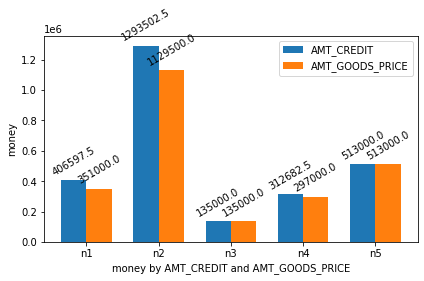

In [14]:
import matplotlib

labels = ['n1', 'n2', 'n3', 'n4', 'n5']
AMT_CREDIT = a
AMT_GOODS_PRICE = b

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, AMT_CREDIT, width, label='AMT_CREDIT')
rects2 = ax.bar(x + width/2, AMT_GOODS_PRICE, width, label='AMT_GOODS_PRICE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('money')
ax.set_xlabel('money by AMT_CREDIT and AMT_GOODS_PRICE')
# ax.set_title('money by AMT_CREDIT and AMT_GOODS_PRICE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=30)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
# 1e6 是科學技術法 即 1x10^6 ,10的6次方

In [65]:
# scatter // AMT_INCOME_TOTAL(總收入)(x軸) and AMT_CREDIT(信貸)(y軸)//CODE_GENDER分別
x1, y1, x2, y2, x3, y3 = [], [], [], [], [], []
for i ,row in enumerate(app_train['CODE_GENDER']):
  if app_train['CODE_GENDER'][i] == 'M':
    x1.append(app_train['AMT_INCOME_TOTAL'][i])
    y1.append(app_train['AMT_CREDIT'][i])
  elif app_train['CODE_GENDER'][i] == 'F':
    x2.append(app_train['AMT_INCOME_TOTAL'][i])
    y2.append(app_train['AMT_CREDIT'][i])
  elif app_train['CODE_GENDER'][i] == 'XNA':
    x3.append(app_train['AMT_INCOME_TOTAL'][i])
    y3.append(app_train['AMT_CREDIT'][i])

In [101]:
print(len(x1))
print(len(x2))
print(len(x3))
print(len(x1)+len(x2)+len(x3))

105059
202448
4
307511


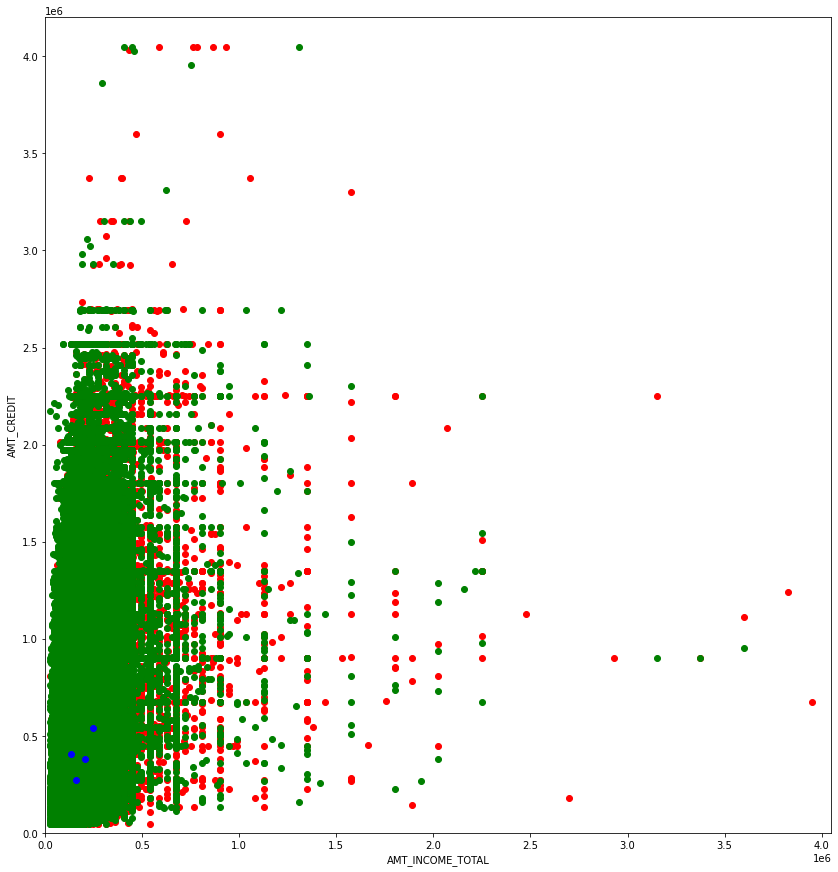

In [99]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect(1)

x1 = x1
y1 = y1
x2 = x2
y2 = y2
x3 = x3
y3 = y3

ax.scatter(x1, y1, color="r") #male 
ax.scatter(x2, y2, color="g") #female
ax.scatter(x3, y3, color="b") #xna

ax.set_xlabel('AMT_INCOME_TOTAL')
ax.set_ylabel('AMT_CREDIT')

ax.set_xlim(0, 4050000.0)
ax.set_ylim(0, 4200000.0)

plt.show()  

In [15]:
# Covariance Matrix Of Values
app_train.cov()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.056582e+10,-59.041266,-83.819815,-4.436777e+07,-1.419730e+07,-6.449708e+05,-8.802091e+06,1.207224,-6.727735e+05,1.984012e+07,-3.524820e+05,-5.963704e+04,2234.460918,5.198222e-01,-52.792950,-17.026415,12.488786,127.210825,6.675923,-271.010601,-56.230029,-58.787004,117.591486,-3.550655,24.765159,58.934592,-52.006771,-68.495018,2.649812,1.772347,45.995027,4.447758,17.332631,-17.572568,9.445500,68.761831,-11.445532,67.314718,-29.634828,72.188677,...,-2.666795e+01,68.476093,47.285238,14.369227,31.523433,25.459430,-14.730909,17.623001,25.290020,-347.759692,-3.758572,-348.162035,44.212225,-7.291903e+04,0.467797,-159.105827,-3.835537e+00,-13.758077,61.789431,-3.835484,50.845908,9.635097e+00,-3.995240e-01,-12.911967,-2.740465e-01,5.460625,-5.991139,9.303135,-7.376408,2.433360,4.698847,0.419252,2.482850e+00,5.313017e-01,-23.040329,-24.972988,44.172238,45.722000,83.687998,895.504293
TARGET,-5.904127e+01,0.074212,0.003774,-2.572156e+02,-3.329871e+03,-5.060535e+01,-3.990170e+03,-0.000140,9.301338e+01,-1.729247e+03,4.028327e+01,2.115931e+01,0.116457,2.625242e-07,0.004814,0.003105,0.000004,-0.002915,-0.000111,0.002309,0.008168,0.008340,-0.021500,0.000186,0.000415,0.000152,0.003247,0.005850,0.003400,-0.008632,-0.008352,-0.009330,-0.000812,-0.000475,-0.000147,-0.000635,-0.000358,-0.001166,-0.000488,-0.001620,...,-4.856418e-04,-0.001616,-0.001370,-0.000236,-0.000584,-0.000937,-0.000033,-0.000237,-0.000893,0.005977,0.003928,0.005854,0.003089,1.243732e+01,0.000010,0.005482,-6.563105e-06,-0.000010,-0.002208,-0.000006,-0.000599,-7.386142e-05,-1.837669e-06,-0.000072,-5.250484e-07,-0.000187,-0.000140,-0.000062,-0.000314,-0.000015,-0.000195,-0.000009,1.321271e-06,1.848698e-05,0.000021,0.000080,0.000043,-0.003047,-0.000429,0.009943
CNT_CHILDREN,-8.381982e+01,0.003774,0.521459,2.205820e+03,6.235671e+02,2.237060e+02,-4.874046e+02,-0.000255,1.042894e+03,-2.446582e+04,4.665487e+02,-3.054135e+01,0.079171,1.356222e-06,0.066797,0.016050,-0.000025,-0.009708,0.003778,0.578157,0.009345,0.008997,-0.017197,-0.001175,0.001297,0.002116,0.003891,0.021485,0.019390,-0.022349,-0.002486,-0.006047,-0.000975,-0.000475,0.000279,0.002321,0.000007,-0.000645,-0.000568,-0.000956,...,-5.691068e-04,-0.000934,-0.000905,-0.000158,-0.000506,-0.000771,0.000133,0.000003,-0.000590,0.027041,-0.000407,0.026182,-0.000487,-3.501833e+00,0.000008,0.018624,-2.414976e-05,-0.001475,-0.032132,-0.000015,0.010207,-8.984421e-05,-9.493552e-06,-0.000240,5.394833e-07,0.000169,-0.000213,0.000091,0.000763,0.000009,0.000261,0.000015,1.606428e-05,-3.237726e-05,-0.000